### Load Data

In [1]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
max([max(sequence) for sequence in train_data])

9999

### Check a review

In [3]:
# Convert numbered review to actual review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Vectorize input data and labels

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [5]:
print(train_labels.shape)
train_labels

(25000,)


array([1, 0, 0, ..., 0, 1, 0])

In [6]:
print(test_labels.shape)
test_labels

(25000,)


array([0, 1, 1, ..., 0, 0, 0])

### Distribution

12500


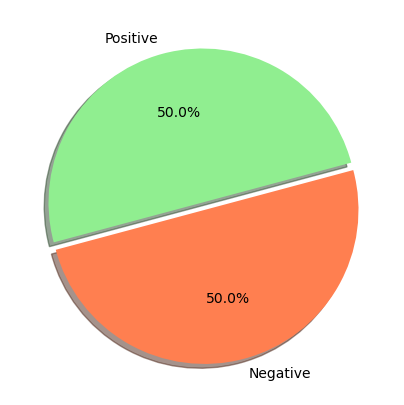

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(5,5))
colors = ["lightgreen",'coral']
pos = 0
neg = 0
for x in train_labels:
  if x==0:
      neg=neg+1
  else:
      pos=pos+1
ck=[]
ck.append(pos)
ck.append(neg)
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 15,
                 explode=(0, 0.05))
print(pos)

In [8]:
print(X_train.shape)
X_train

(25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [10]:
print(y_test.shape)
y_test


(25000,)


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [11]:
from keras import models
from keras import layers

In [12]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics

In [13]:
# Input for Validation
X_val = X_train[:5000]
partial_X_train = X_train[5000:]

# Labels for validation
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

### Training Model

In [27]:
trainingLoss = {}
from tensorflow import keras
from optimizers.ADAM import ADAM
from optimizers.opts import AdaDelta, Momentum, AdaGrad

def trainDifOptimizer(optmzr):
    # torch.manual_seed(seed)
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = getattr(optimizers,"Adam")(lr=0.01) 
    elif optmzr=='AdaDelta_scratch':
      optimizer = getattr(optimizers,"Adadelta")(lr=0.01)
    elif optmzr=='Momentum_scratch':
      optimizer = getattr(optimizers,"momentum")(lr=0.01)
    elif optmzr=='AdaGrad_scratch':
      optimizer = getattr(optimizers,"Adagrad")(lr=0.01)
    else:
      optimizer = getattr(optimizers, optmzr)(lr=0.01)
    
    model.compile(optimizer=optimizer,
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])
    n_epochs = 15 

    trainLossForOptimizer = []
    print("\n-----------------------------------------\n")
    print("Optimizer : ", optmzr, "\n")
    history = model.fit(partial_X_train,
                partial_y_train,
                epochs=15,
                batch_size=100,
                validation_data=(X_val, y_val))

    trainingLoss[optmzr] = history.history['loss']
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam_scratch','RMSprop','Adam', 'SGD','Adadelta','AdaGrad_scratch','AdaDelta_scratch',]
# optimizersLst = ['Adam_scratch','AdaGrad_scratch','AdaDelta_scratch','Momentum_scratch']
for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)

print(trainingLoss)


-----------------------------------------

Optimizer :  Adam_scratch 

Epoch 1/15


2022-12-02 15:46:19.368280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/200 [============================>.] - ETA: 0s - loss: 0.3357 - binary_accuracy: 0.8562

2022-12-02 15:46:22.293791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 5s 16ms/step - loss: 0.3348 - binary_accuracy: 0.8566 - val_loss: 0.2753 - val_binary_accuracy: 0.8850
Epoch 2/15
200/200 [==============================] - 3s 15ms/step - loss: 0.1637 - binary_accuracy: 0.9362 - val_loss: 0.3248 - val_binary_accuracy: 0.8758
Epoch 3/15
200/200 [==============================] - 3s 14ms/step - loss: 0.1069 - binary_accuracy: 0.9577 - val_loss: 0.3907 - val_binary_accuracy: 0.8724
Epoch 4/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0667 - binary_accuracy: 0.9737 - val_loss: 0.5503 - val_binary_accuracy: 0.8674
Epoch 5/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0571 - binary_accuracy: 0.9775 - val_loss: 0.6509 - val_binary_accuracy: 0.8662
Epoch 6/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0391 - binary_accuracy: 0.9863 - val_loss: 0.7006 - val_binary_accuracy: 0.8628
Epoch 7/15
200/200 [==============================] - 2s 12ms/step - 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15


2022-12-02 15:47:01.681912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


199/200 [============================>.] - ETA: 0s - loss: 0.3669 - binary_accuracy: 0.8399

2022-12-02 15:47:04.878857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 17ms/step - loss: 0.3670 - binary_accuracy: 0.8400 - val_loss: 0.2873 - val_binary_accuracy: 0.8866
Epoch 2/15
200/200 [==============================] - 3s 16ms/step - loss: 0.2048 - binary_accuracy: 0.9206 - val_loss: 0.2914 - val_binary_accuracy: 0.8858
Epoch 3/15
200/200 [==============================] - 4s 18ms/step - loss: 0.1449 - binary_accuracy: 0.9446 - val_loss: 0.3336 - val_binary_accuracy: 0.8854
Epoch 4/15
200/200 [==============================] - 3s 15ms/step - loss: 0.1033 - binary_accuracy: 0.9628 - val_loss: 0.4015 - val_binary_accuracy: 0.8794
Epoch 5/15
200/200 [==============================] - 3s 15ms/step - loss: 0.0717 - binary_accuracy: 0.9740 - val_loss: 0.5835 - val_binary_accuracy: 0.8800
Epoch 6/15
200/200 [==============================] - 3s 15ms/step - loss: 0.0501 - binary_accuracy: 0.9819 - val_loss: 0.6980 - val_binary_accuracy: 0.8742
Epoch 7/15
200/200 [==============================] - 3s 15ms/step - 

2022-12-02 15:47:49.940149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/200 [============================>.] - ETA: 0s - loss: 0.3270 - binary_accuracy: 0.8609

2022-12-02 15:47:52.808594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 16ms/step - loss: 0.3254 - binary_accuracy: 0.8616 - val_loss: 0.2781 - val_binary_accuracy: 0.8816
Epoch 2/15
200/200 [==============================] - 3s 13ms/step - loss: 0.1578 - binary_accuracy: 0.9362 - val_loss: 0.3148 - val_binary_accuracy: 0.8824
Epoch 3/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0874 - binary_accuracy: 0.9665 - val_loss: 0.4367 - val_binary_accuracy: 0.8684
Epoch 4/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0654 - binary_accuracy: 0.9748 - val_loss: 0.4956 - val_binary_accuracy: 0.8704
Epoch 5/15
200/200 [==============================] - 3s 13ms/step - loss: 0.0431 - binary_accuracy: 0.9835 - val_loss: 0.6403 - val_binary_accuracy: 0.8710
Epoch 6/15
200/200 [==============================] - 2s 12ms/step - loss: 0.0288 - binary_accuracy: 0.9881 - val_loss: 0.6804 - val_binary_accuracy: 0.8660
Epoch 7/15
200/200 [==============================] - 3s 13ms/step - 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
  1/200 [..............................] - ETA: 1:11 - loss: 0.7076 - binary_accuracy: 0.4200

2022-12-02 15:48:30.517136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/200 [============================>.] - ETA: 0s - loss: 0.6808 - binary_accuracy: 0.5406

2022-12-02 15:48:33.672566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 17ms/step - loss: 0.6804 - binary_accuracy: 0.5422 - val_loss: 0.6630 - val_binary_accuracy: 0.6054
Epoch 2/15
200/200 [==============================] - 2s 12ms/step - loss: 0.6204 - binary_accuracy: 0.7050 - val_loss: 0.5902 - val_binary_accuracy: 0.7152
Epoch 3/15
200/200 [==============================] - 2s 12ms/step - loss: 0.5326 - binary_accuracy: 0.8005 - val_loss: 0.4980 - val_binary_accuracy: 0.8126
Epoch 4/15
200/200 [==============================] - 3s 14ms/step - loss: 0.4457 - binary_accuracy: 0.8364 - val_loss: 0.4247 - val_binary_accuracy: 0.8306
Epoch 5/15
200/200 [==============================] - 3s 13ms/step - loss: 0.3800 - binary_accuracy: 0.8553 - val_loss: 0.3748 - val_binary_accuracy: 0.8476
Epoch 6/15
200/200 [==============================] - 2s 12ms/step - loss: 0.3366 - binary_accuracy: 0.8672 - val_loss: 0.3457 - val_binary_accuracy: 0.8614
Epoch 7/15
200/200 [==============================] - 2s 12ms/step - 

2022-12-02 15:49:09.976882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


199/200 [============================>.] - ETA: 0s - loss: 0.6926 - binary_accuracy: 0.5057

2022-12-02 15:49:13.268316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 18ms/step - loss: 0.6926 - binary_accuracy: 0.5056 - val_loss: 0.6911 - val_binary_accuracy: 0.5092
Epoch 2/15
200/200 [==============================] - 3s 13ms/step - loss: 0.6880 - binary_accuracy: 0.5267 - val_loss: 0.6863 - val_binary_accuracy: 0.5270
Epoch 3/15
200/200 [==============================] - 3s 15ms/step - loss: 0.6812 - binary_accuracy: 0.5507 - val_loss: 0.6787 - val_binary_accuracy: 0.5570
Epoch 4/15
200/200 [==============================] - 3s 17ms/step - loss: 0.6714 - binary_accuracy: 0.5854 - val_loss: 0.6681 - val_binary_accuracy: 0.6044
Epoch 5/15
200/200 [==============================] - 2s 12ms/step - loss: 0.6586 - binary_accuracy: 0.6390 - val_loss: 0.6545 - val_binary_accuracy: 0.6704
Epoch 6/15
200/200 [==============================] - 3s 14ms/step - loss: 0.6428 - binary_accuracy: 0.6990 - val_loss: 0.6377 - val_binary_accuracy: 0.7278
Epoch 7/15
200/200 [==============================] - 3s 14ms/step - 

2022-12-02 15:49:56.807289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


199/200 [============================>.] - ETA: 0s - loss: 0.6225 - binary_accuracy: 0.6911

2022-12-02 15:50:00.966340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 5s 25ms/step - loss: 0.6218 - binary_accuracy: 0.6919 - val_loss: 0.4955 - val_binary_accuracy: 0.8100
Epoch 2/15
200/200 [==============================] - 4s 18ms/step - loss: 0.4038 - binary_accuracy: 0.8457 - val_loss: 0.3588 - val_binary_accuracy: 0.8572
Epoch 3/15
200/200 [==============================] - 3s 16ms/step - loss: 0.3149 - binary_accuracy: 0.8736 - val_loss: 0.3180 - val_binary_accuracy: 0.8728
Epoch 4/15
200/200 [==============================] - 3s 13ms/step - loss: 0.2728 - binary_accuracy: 0.8928 - val_loss: 0.3003 - val_binary_accuracy: 0.8794
Epoch 5/15
200/200 [==============================] - 3s 14ms/step - loss: 0.2461 - binary_accuracy: 0.9043 - val_loss: 0.2937 - val_binary_accuracy: 0.8820
Epoch 6/15
200/200 [==============================] - 3s 15ms/step - loss: 0.2255 - binary_accuracy: 0.9148 - val_loss: 0.2873 - val_binary_accuracy: 0.8832
Epoch 7/15
200/200 [==============================] - 3s 14ms/step - 

2022-12-02 15:50:43.372759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/200 [============================>.] - ETA: 0s - loss: 0.6913 - binary_accuracy: 0.5257

2022-12-02 15:50:46.295953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 16ms/step - loss: 0.6912 - binary_accuracy: 0.5265 - val_loss: 0.6871 - val_binary_accuracy: 0.5586
Epoch 2/15
200/200 [==============================] - 2s 11ms/step - loss: 0.6786 - binary_accuracy: 0.6113 - val_loss: 0.6715 - val_binary_accuracy: 0.6440
Epoch 3/15
200/200 [==============================] - 3s 13ms/step - loss: 0.6569 - binary_accuracy: 0.6879 - val_loss: 0.6477 - val_binary_accuracy: 0.7004
Epoch 4/15
200/200 [==============================] - 2s 11ms/step - loss: 0.6294 - binary_accuracy: 0.7424 - val_loss: 0.6206 - val_binary_accuracy: 0.7484
Epoch 5/15
200/200 [==============================] - 2s 12ms/step - loss: 0.6003 - binary_accuracy: 0.7825 - val_loss: 0.5929 - val_binary_accuracy: 0.7768
Epoch 6/15
200/200 [==============================] - 2s 11ms/step - loss: 0.5711 - binary_accuracy: 0.8048 - val_loss: 0.5659 - val_binary_accuracy: 0.7958
Epoch 7/15
200/200 [==============================] - 2s 11ms/step - 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

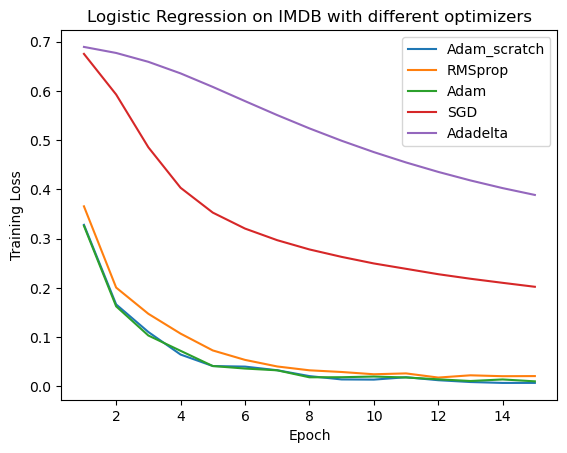

In [16]:
# Plotting losses
Xval = np.arange(1, 16)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("Logistic Regression on IMDB with different optimizers")  # add title

for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()

### Accuracy and Result

In [17]:
# Making Predictions for testing data

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam",
          loss = losses.binary_crossentropy,
            metrics = [metrics.binary_accuracy])

history = model.fit(partial_X_train,
            partial_y_train,
            epochs=15,
            batch_size=100,
            validation_data=(X_val, y_val))


np.set_printoptions(suppress=True)
result = model.predict(X_test)

Epoch 1/15


2022-11-29 12:43:35.745500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


198/200 [============================>.] - ETA: 0s - loss: 0.3557 - binary_accuracy: 0.8595

2022-11-29 12:43:41.840582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 8s 33ms/step - loss: 0.3552 - binary_accuracy: 0.8598 - val_loss: 0.2787 - val_binary_accuracy: 0.8890
Epoch 2/15
200/200 [==============================] - 6s 28ms/step - loss: 0.1805 - binary_accuracy: 0.9352 - val_loss: 0.2976 - val_binary_accuracy: 0.8858
Epoch 3/15
200/200 [==============================] - 5s 24ms/step - loss: 0.1246 - binary_accuracy: 0.9569 - val_loss: 0.3563 - val_binary_accuracy: 0.8802
Epoch 4/15
200/200 [==============================] - 5s 26ms/step - loss: 0.0854 - binary_accuracy: 0.9712 - val_loss: 0.4105 - val_binary_accuracy: 0.8748
Epoch 5/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0535 - binary_accuracy: 0.9841 - val_loss: 0.4935 - val_binary_accuracy: 0.8726
Epoch 6/15
200/200 [==============================] - 4s 22ms/step - loss: 0.0295 - binary_accuracy: 0.9931 - val_loss: 0.5623 - val_binary_accuracy: 0.8722
Epoch 7/15
200/200 [==============================] - 4s 22ms/step - 

2022-11-29 12:44:48.627982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 7s 9ms/step


In [18]:
result

array([[0.0003409 ],
       [1.        ],
       [0.00056419],
       ...,
       [0.00035609],
       [0.0001714 ],
       [0.9998851 ]], dtype=float32)

In [19]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [20]:
from sklearn.metrics import mean_absolute_error,accuracy_score
print("Mean Absolute Error :", mean_absolute_error(y_pred, y_test))
print("Accuracy :",100*(accuracy_score(y_test, y_pred)))

Mean Absolute Error : 0.14708
Accuracy : 85.292
